## Energieconsumptie – Normaal Verdeeld

Het gemiddelde stroomverbruik van **6,8 kWh** wordt over een dag verdeeld met **random variatie per uur**, en met **invloed van tijdsblokken** zoals ochtend, middag, avond en nacht. Zo kun je bijvoorbeeld meer verbruik simuleren in de avond en minder ’s nachts, met wat willekeurige afwijking per uur om het realistisch te maken.

### Aanpak in stappen

#### 1. Dagindeling maken

Verdeel de dag in 24 uur, of groepeer het in blokken zoals:

- **Nacht** (00:00–06:00)  
- **Ochtend** (06:00–12:00)  
- **Middag** (12:00–18:00)  
- **Avond** (18:00–00:00)  

#### 2. Basisprofiel opstellen

Ken een relatief gewicht toe aan elk blok. Bijvoorbeeld:

- Nacht: **5%**  
- Ochtend: **25%**  
- Middag: **30%**  
- Avond: **40%**  

> Deze percentages moeten samen **100%** zijn.

#### 3. Verbruik per uur berekenen op basis van blokken

Gebruik de gewichten om het totale verbruik (6,8 kWh) over de uren te verdelen.  
Elk uur binnen een blok krijgt dan een **basisverbruik** op basis van het percentage, gedeeld door het aantal uren in dat blok.

#### 4. Willekeurige afwijking toevoegen

Voeg een **random variatie** toe per uur.  
Dit kun je bijvoorbeeld doen met een **normale verdeling** (`numpy.random.normal`) rond **1.0**, met een kleine standaarddeviatie (zoals **0.1**) om het te variëren zonder dat het te veel afwijkt.


Verbruik per uur (kWh):
00:00 - 0.06 kWh
01:00 - 0.06 kWh
02:00 - 0.06 kWh
03:00 - 0.07 kWh
04:00 - 0.05 kWh
05:00 - 0.05 kWh
06:00 - 0.35 kWh
07:00 - 0.32 kWh
08:00 - 0.26 kWh
09:00 - 0.31 kWh
10:00 - 0.26 kWh
11:00 - 0.26 kWh
12:00 - 0.35 kWh
13:00 - 0.24 kWh
14:00 - 0.25 kWh
15:00 - 0.31 kWh
16:00 - 0.29 kWh
17:00 - 0.36 kWh
18:00 - 0.39 kWh
19:00 - 0.36 kWh
20:00 - 0.55 kWh
21:00 - 0.44 kWh
22:00 - 0.46 kWh
23:00 - 0.36 kWh

Totaal verbruik: 6.48 kWh


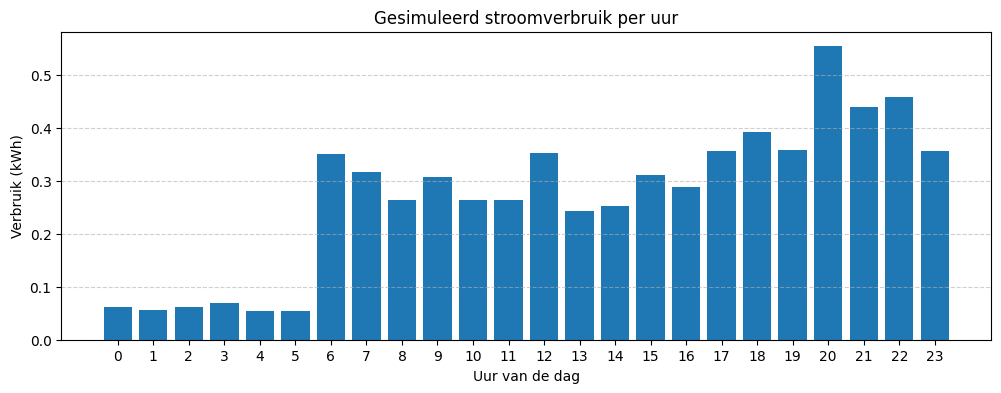

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Instellingen
gemiddeld_verbruik = 6.8  # kWh
dagdelen = {
    'nacht': {'uren': range(0, 6), 'percentage': 0.05},
    'ochtend': {'uren': range(6, 12), 'percentage': 0.25},
    'middag': {'uren': range(12, 18), 'percentage': 0.30},
    'avond': {'uren': range(18, 24), 'percentage': 0.40},
}

# Verbruik per uur zonder afwijking
basisverbruik_per_uur = np.zeros(24)
for deel, info in dagdelen.items():
    uren = info['uren']
    totaal_in_deel = info['percentage'] * gemiddeld_verbruik
    per_uur = totaal_in_deel / len(uren)
    for uur in uren:
        basisverbruik_per_uur[uur] = per_uur

# Random afwijking toevoegen (normale verdeling, gemiddeld 1.0)
np.random.seed(42)  # voor herhaalbaarheid
afwijking = np.random.normal(loc=1.0, scale=0.15, size=24)
simulatie = basisverbruik_per_uur * afwijking

# Resultaten
print("Verbruik per uur (kWh):")
for uur, waarde in enumerate(simulatie):
    print(f"{uur:02d}:00 - {waarde:.2f} kWh")

print(f"\nTotaal verbruik: {simulatie.sum():.2f} kWh")


# Plotten (optioneel)
plt.figure(figsize=(12, 4))
plt.bar(range(24), simulatie)
plt.title("Gesimuleerd stroomverbruik per uur")
plt.xlabel("Uur van de dag")
plt.ylabel("Verbruik (kWh)")
plt.xticks(range(24))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

## Simulatie over meerdere dagen

In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

# Instellingen
gemiddeld_verbruik = 6.8  # kWh per dag
dagen = 7  # aantal dagen simuleren

dagdelen = {
    'nacht': {'uren': range(0, 6), 'percentage': 0.05},
    'ochtend': {'uren': range(6, 12), 'percentage': 0.25},
    'middag': {'uren': range(12, 18), 'percentage': 0.30},
    'avond': {'uren': range(18, 24), 'percentage': 0.40},
}

def simuleer_dag(seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Stap 1-3: basisverbruik per uur op basis van tijdsblokken
    basisverbruik = np.zeros(24)
    for blok, info in dagdelen.items():
        uren = info['uren']
        totaal_in_blok = info['percentage'] * gemiddeld_verbruik
        per_uur = totaal_in_blok / len(uren)
        for uur in uren:
            basisverbruik[uur] = per_uur
    
    # Stap 4: random afwijking per uur
    afwijking = np.random.normal(loc=1.0, scale=0.15, size=24)
    verbruik = basisverbruik * afwijking
    return verbruik

# Simulatie over meerdere dagen
data = []
for dag in range(dagen):
    verbruik_per_uur = simuleer_dag(seed=dag)
    totaal = verbruik_per_uur.sum()
    dag_data = {
        'dag': dag + 1,
        **{f'{uur}': round(verbruik_per_uur[uur], 3) for uur in range(24)},
        'totaal_kWh': round(totaal, 3)
    }
    data.append(dag_data)

# Zet in DataFrame
df = pd.DataFrame(data)

# Toon resultaat
display(df)

# Opslaan (optioneel)
# df.to_csv('energieverbruik_simulatie.csv', index=False)


,dag,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,totaal_kWh
0,1,0.072,0.060,0.065,0.076,0.073,0.048,0.324,0.277,0.279,0.301,0.289,0.345,0.379,0.346,0.363,0.357,0.416,0.330,0.475,0.395,0.280,0.498,0.512,0.403,6.961
1,2,0.070,0.051,0.052,0.048,0.064,0.037,0.357,0.251,0.297,0.273,0.345,0.196,0.324,0.320,0.398,0.284,0.331,0.295,0.456,0.493,0.378,0.531,0.515,0.488,6.855
2,3,0.053,0.056,0.039,0.071,0.041,0.050,0.305,0.230,0.238,0.245,0.307,0.381,0.342,0.283,0.367,0.310,0.339,0.400,0.402,0.454,0.394,0.443,0.471,0.386,6.606
3,4,0.072,0.060,0.057,0.041,0.054,0.054,0.280,0.257,0.281,0.263,0.227,0.321,0.385,0.427,0.343,0.319,0.312,0.261,0.520,0.378,0.373,0.439,0.554,0.469,6.750
4,5,0.057,0.061,0.048,0.063,0.053,0.043,0.256,0.309,0.297,0.235,0.310,0.280,0.362,0.357,0.281,0.358,0.309,0.419,0.503,0.456,0.386,0.457,0.464,0.371,6.734
5,6,0.060,0.054,0.077,0.055,0.058,0.070,0.245,0.258,0.291,0.269,0.233,0.275,0.322,0.371,0.255,0.304,0.399,0.435,0.351,0.497,0.387,0.395,0.394,0.425,6.478
6,7,0.054,0.063,0.059,0.049,0.036,0.064,0.331,0.219,0.353,0.265,0.395,0.309,0.323,0.403,0.346,0.347,0.344,0.332,0.496,0.508,0.477,0.577,0.361,0.422,7.133


In [3]:
display(df)

,dag,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,totaal_kWh
0,1,0.072,0.060,0.065,0.076,0.073,0.048,0.324,0.277,0.279,...,0.357,0.416,0.330,0.475,0.395,0.280,0.498,0.512,0.403,6.961
1,2,0.070,0.051,0.052,0.048,0.064,0.037,0.357,0.251,0.297,...,0.284,0.331,0.295,0.456,0.493,0.378,0.531,0.515,0.488,6.855
2,3,0.053,0.056,0.039,0.071,0.041,0.050,0.305,0.230,0.238,...,0.310,0.339,0.400,0.402,0.454,0.394,0.443,0.471,0.386,6.606
3,4,0.072,0.060,0.057,0.041,0.054,0.054,0.280,0.257,0.281,...,0.319,0.312,0.261,0.520,0.378,0.373,0.439,0.554,0.469,6.750
4,5,0.057,0.061,0.048,0.063,0.053,0.043,0.256,0.309,0.297,...,0.358,0.309,0.419,0.503,0.456,0.386,0.457,0.464,0.371,6.734
5,6,0.060,0.054,0.077,0.055,0.058,0.070,0.245,0.258,0.291,...,0.304,0.399,0.435,0.351,0.497,0.387,0.395,0.394,0.425,6.478
6,7,0.054,0.063,0.059,0.049,0.036,0.064,0.331,0.219,0.353,...,0.347,0.344,0.332,0.496,0.508,0.477,0.577,0.361,0.422,7.133


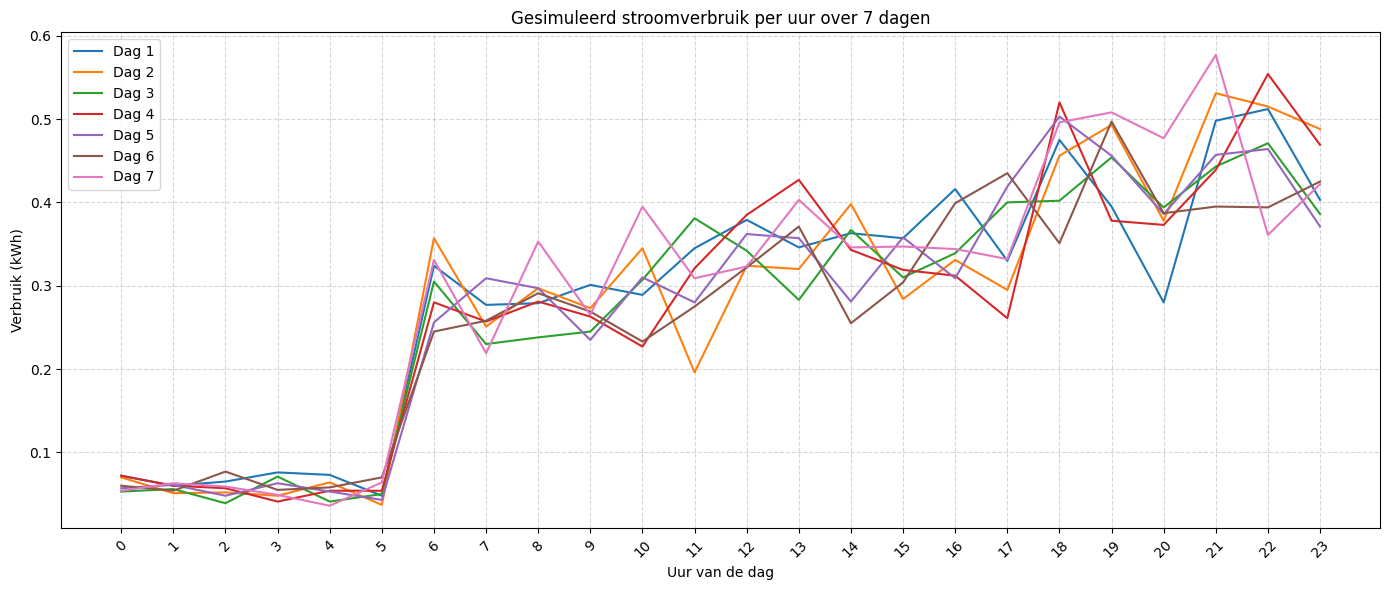

In [8]:
import matplotlib.pyplot as plt

# Visualisatie
plt.figure(figsize=(14, 6))

for i, row in df.iterrows():
    uren = [f'{h}' for h in range(24)]
    waarden = [row[uur] for uur in uren]
    plt.plot(range(24), waarden, label=f'Dag {int(row["dag"])}')

plt.xticks(range(24), uren, rotation=45)
plt.xlabel("Uur van de dag")
plt.ylabel("Verbruik (kWh)")
plt.title(f"Gesimuleerd stroomverbruik per uur over {dagen} dagen")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### Outliers (extra verbruiksmomenten)

Om realistisch energieverbruik te simuleren, zijn **1 à 2 outliers per week** toegevoegd. Denk aan apparaten zoals een wasmachine of vaatwasser.

**Kenmerken van de outliers:**
- Willekeurige dag (1–2 per week)
- Willekeurig uur tussen 06:00 en 22:00
- Extra verbruik tussen **1.0 en 2.0 kWh**
- Toegevoegd bovenop het normale uurverbruik

De outliers worden ook gelogd in de console, bijvoorbeeld:

### Datum in plaats van dagnummer

De simulatie begint nu op **1 januari 2024**, en loopt door over het gewenste aantal dagen.

In plaats van `dag 1, 2, 3...` is er nu een echte datumkolom (`datum`) in het DataFrame, die automatisch oploopt:


Outliers toegevoegd op:
- 01-01-2024, uur 08:00 → +0.64 kWh
- 06-01-2024, uur 10:00 → +1.46 kWh


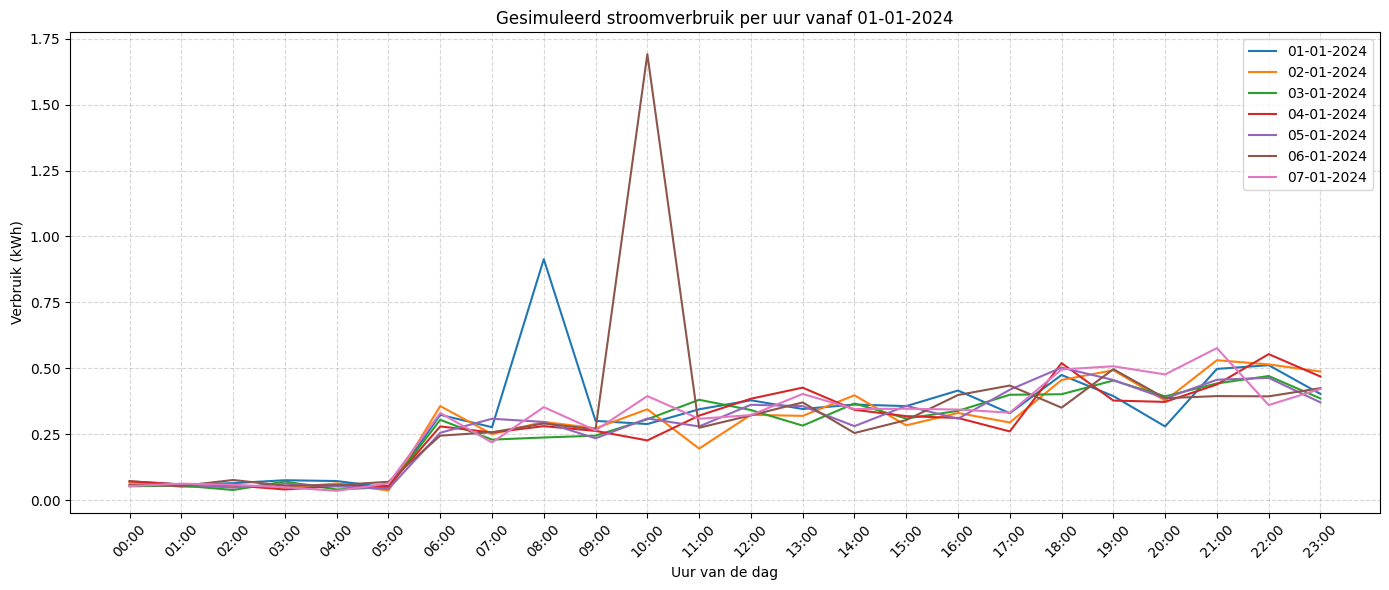

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instellingen
gemiddeld_verbruik = 6.8  # kWh per dag
dagen = 7  # aantal dagen simuleren
outliers_per_week = 2  # aantal dagen met extra verbruik
startdatum = pd.to_datetime("01-01-2024")  # begin van simulatie

dagdelen = {
    'nacht': {'uren': range(0, 6), 'percentage': 0.05},
    'ochtend': {'uren': range(6, 12), 'percentage': 0.25},
    'middag': {'uren': range(12, 18), 'percentage': 0.30},
    'avond': {'uren': range(18, 24), 'percentage': 0.40},
}

def simuleer_dag(seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    basisverbruik = np.zeros(24)
    for blok, info in dagdelen.items():
        uren = info['uren']
        totaal_in_blok = info['percentage'] * gemiddeld_verbruik
        per_uur = totaal_in_blok / len(uren)
        for uur in uren:
            basisverbruik[uur] = per_uur

    afwijking = np.random.normal(loc=1.0, scale=0.15, size=24)
    verbruik = basisverbruik * afwijking
    return verbruik

# Simulatie
data = []
np.random.seed(np.random.choice(range(1000)))
outlier_dagen = np.random.choice(range(dagen), size=outliers_per_week, replace=False)
outlier_info = []

for dag in range(dagen):
    datum = (startdatum + pd.Timedelta(days=dag)).strftime("%d-%m-%Y")
    verbruik_per_uur = simuleer_dag(seed=dag)
    
    if dag in outlier_dagen:
        uur = np.random.randint(6, 23)
        extra_verbruik = np.random.uniform(0.5, 1.5)
        verbruik_per_uur[uur] += extra_verbruik
        outlier_info.append((datum, uur, extra_verbruik))

    totaal = verbruik_per_uur.sum()
    dag_data = {
        'datum': datum,
        **{f'{uur:02d}:00': round(verbruik_per_uur[uur], 3) for uur in range(24)},
        'totaal_kWh': round(totaal, 3)
    }
    data.append(dag_data)

# DataFrame maken
df = pd.DataFrame(data)

# Print outliers
print("Outliers toegevoegd op:")
for d, u, v in outlier_info:
    print(f"- {d}, uur {u:02d}:00 → +{v:.2f} kWh")

# Plotten
plt.figure(figsize=(14, 6))
for i, row in df.iterrows():
    uren = [f'{h:02d}:00' for h in range(24)]
    waarden = [row[uur] for uur in uren]
    plt.plot(range(24), waarden, label=row['datum'])

plt.xticks(range(24), uren, rotation=45)
plt.xlabel("Uur van de dag")
plt.ylabel("Verbruik (kWh)")
plt.title(f"Gesimuleerd stroomverbruik per uur vanaf {startdatum.strftime('%d-%m-%Y')}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [3]:
df

,datum,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,totaal_kWh
0,01-01-2024,0.072,0.060,0.065,0.076,0.073,0.048,0.324,0.277,0.914,...,0.357,0.416,0.330,0.475,0.395,0.280,0.498,0.512,0.403,7.596
1,02-01-2024,0.070,0.051,0.052,0.048,0.064,0.037,0.357,0.251,0.297,...,0.284,0.331,0.295,0.456,0.493,0.378,0.531,0.515,0.488,6.855
2,03-01-2024,0.053,0.056,0.039,0.071,0.041,0.050,0.305,0.230,0.238,...,0.310,0.339,0.400,0.402,0.454,0.394,0.443,0.471,0.386,6.606
3,04-01-2024,0.072,0.060,0.057,0.041,0.054,0.054,0.280,0.257,0.281,...,0.319,0.312,0.261,0.520,0.378,0.373,0.439,0.554,0.469,6.750
4,05-01-2024,0.057,0.061,0.048,0.063,0.053,0.043,0.256,0.309,0.297,...,0.358,0.309,0.419,0.503,0.456,0.386,0.457,0.464,0.371,6.734
5,06-01-2024,0.060,0.054,0.077,0.055,0.058,0.070,0.245,0.258,0.291,...,0.304,0.399,0.435,0.351,0.497,0.387,0.395,0.394,0.425,7.936
6,07-01-2024,0.054,0.063,0.059,0.049,0.036,0.064,0.331,0.219,0.353,...,0.347,0.344,0.332,0.496,0.508,0.477,0.577,0.361,0.422,7.133


## Meerdere Huishoudens en Profielen definiëren

- We simuleren **30 huishoudens**, elk met een unieke naam (`huishouden_1` t/m `huishouden_30`).
- Elke huishouden krijgt willekeurig één van de volgende profielen toegewezen:
  - `standaard`: Gebalanceerd energieverbruik
  - `vroege_vogel`: Meer verbruik in de ochtend
  - `avondmens`: Piek in de avonduren
  - `zuinig`: Algemeen lager verbruik

,huishouden,profiel,datum,00:00,01:00,02:00,03:00,04:00,05:00,06:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,totaal_kWh
0,huishouden_1,vroege_vogel,2024-01-01,0.050,0.059,0.056,0.062,0.054,0.060,0.446,...,0.345,0.333,0.376,0.337,0.241,0.269,0.279,0.301,0.322,6.755
1,huishouden_1,vroege_vogel,2024-01-02,0.047,0.049,0.054,0.045,0.046,0.051,0.542,...,0.257,0.403,0.395,0.300,0.267,0.308,0.222,0.270,0.337,6.985
2,huishouden_1,vroege_vogel,2024-01-03,0.056,0.048,0.072,0.044,0.054,0.046,0.479,...,1.674,0.290,0.316,0.253,0.335,0.250,0.258,0.281,0.287,8.055
3,huishouden_1,vroege_vogel,2024-01-04,0.045,0.074,0.057,0.055,0.057,0.065,0.407,...,0.329,0.297,0.301,0.295,0.175,0.212,0.253,0.179,0.229,6.109
4,huishouden_1,vroege_vogel,2024-01-05,0.062,0.060,0.050,0.058,0.050,0.050,0.553,...,0.349,0.285,0.339,0.331,0.230,0.240,0.253,0.308,0.264,7.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,huishouden_30,standaard,2024-01-03,0.063,0.056,0.049,0.053,0.047,0.071,0.358,...,0.343,0.356,0.346,0.526,0.396,0.492,0.434,0.407,0.460,6.764
206,huishouden_30,standaard,2024-01-04,0.059,0.048,0.056,0.061,0.053,0.058,0.264,...,0.333,0.379,0.260,0.461,0.378,0.473,0.366,0.424,0.384,6.554
207,huishouden_30,standaard,2024-01-05,0.040,0.061,0.044,0.050,0.052,0.074,0.292,...,0.358,0.288,0.390,0.411,0.382,0.416,0.447,0.480,0.323,6.468
208,huishouden_30,standaard,2024-01-06,0.057,0.066,0.070,0.057,0.062,0.062,0.318,...,0.352,0.292,0.275,0.514,0.534,0.494,0.407,0.451,0.537,7.748


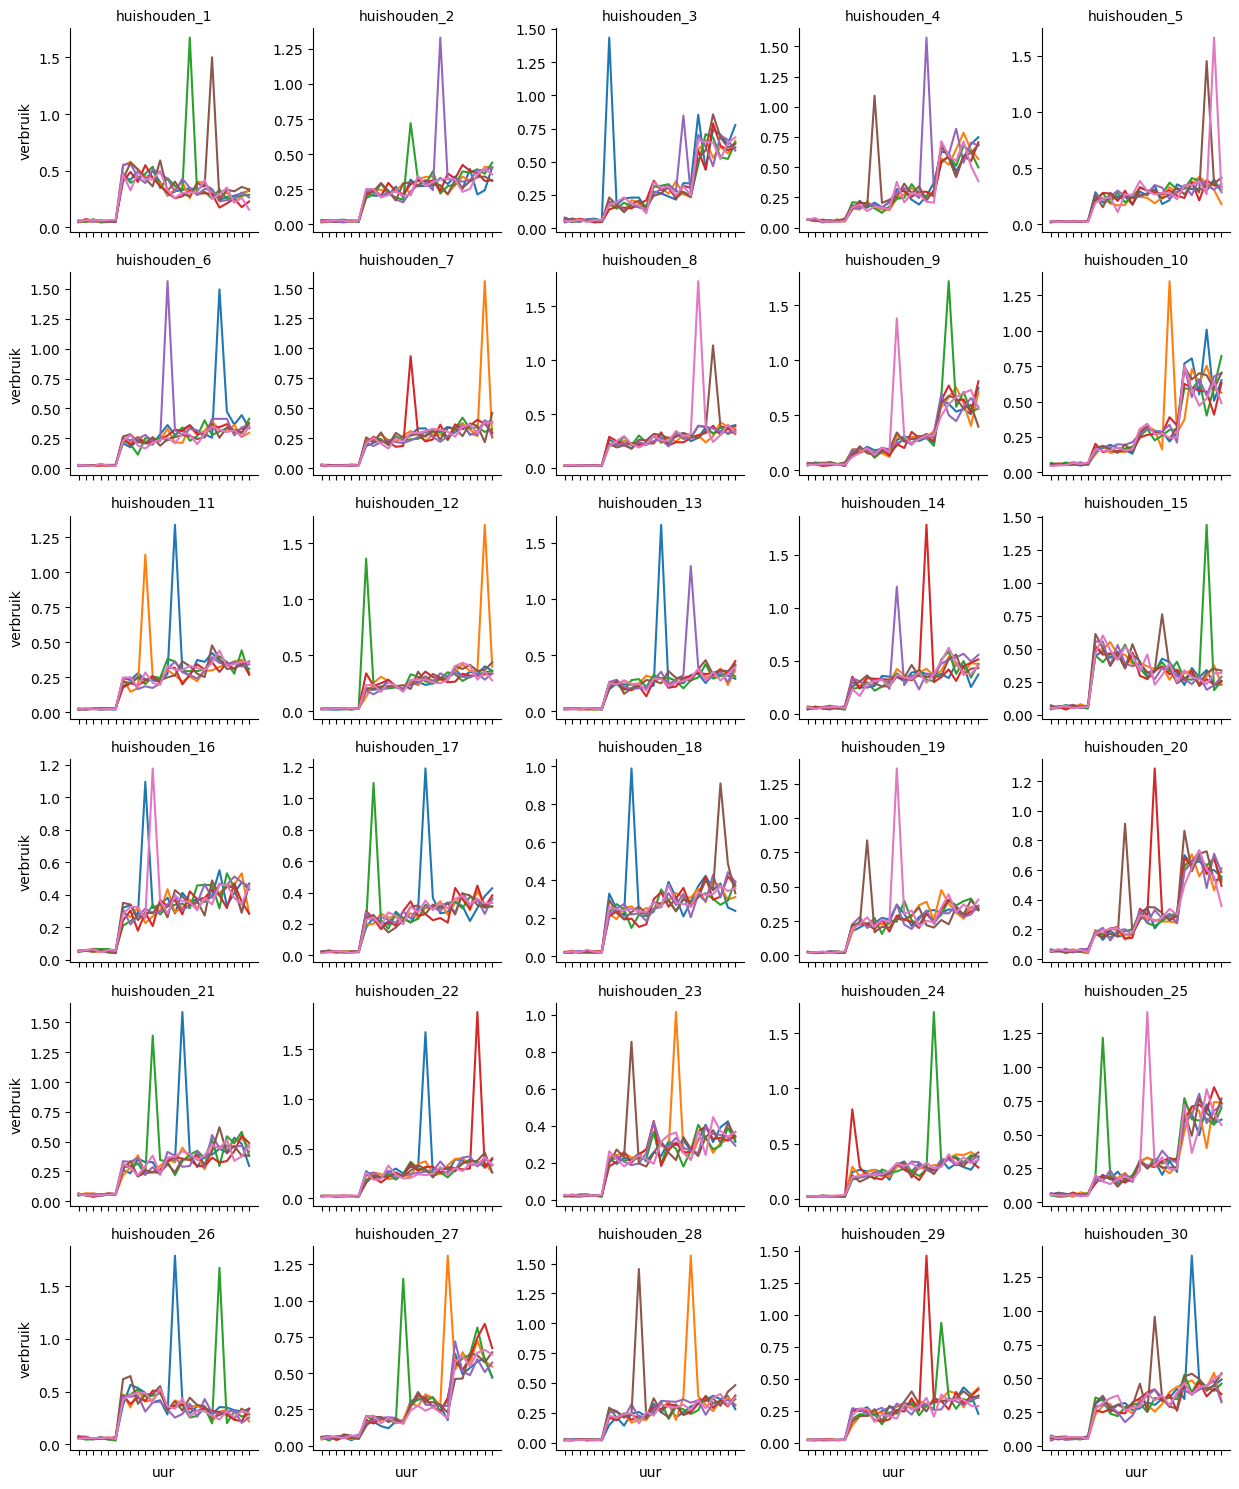

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Dagdelen definitie
dagdelen = {
    'nacht': {'uren': range(0, 6)},
    'ochtend': {'uren': range(6, 12)},
    'middag': {'uren': range(12, 18)},
    'avond': {'uren': range(18, 24)},
}

# Profielen
profielen = {
    "standaard":     {"nacht": 0.05, "ochtend": 0.25, "middag": 0.30, "avond": 0.40},
    "vroege_vogel":  {"nacht": 0.05, "ochtend": 0.40, "middag": 0.30, "avond": 0.25},
    "avondmens":     {"nacht": 0.05, "ochtend": 0.15, "middag": 0.25, "avond": 0.55},
    "zuinig":        {"nacht": 0.02, "ochtend": 0.20, "middag": 0.25, "avond": 0.30}
}

# Simuleer functie
def simuleer_dag(profielnaam, gemiddeld_verbruik=6.8, seed=None):
    if seed is not None:
        np.random.seed(seed)

    profiel = profielen[profielnaam]
    basisverbruik = np.zeros(24)

    for blok, info in dagdelen.items():
        uren = info['uren']
        percentage = profiel[blok]
        totaal_in_blok = percentage * gemiddeld_verbruik
        per_uur = totaal_in_blok / len(uren)
        for uur in uren:
            basisverbruik[uur] = per_uur

    afwijking = np.random.normal(loc=1.0, scale=0.15, size=24)
    verbruik = basisverbruik * afwijking
    return verbruik

# Instellingen
aantal_huishoudens = 30
dagen = 7
startdatum = pd.to_datetime("2024-01-01")
gemiddeld_verbruik = 6.8
outliers_per_week = 2

# Toewijzing profielen per huishouden
huishouden_profielen = {
    f"huishouden_{i}": random.choice(list(profielen.keys()))
    for i in range(1, aantal_huishoudens + 1)
}

# Simulatie
alle_data = []

for h in range(1, aantal_huishoudens + 1):
    naam = f"huishouden_{h}"
    profielnaam = huishouden_profielen[naam]
    outlier_dagen = np.random.choice(range(dagen), size=outliers_per_week, replace=False)

    for dag in range(dagen):
        datum = startdatum + pd.Timedelta(days=dag)
        verbruik_per_uur = simuleer_dag(profielnaam, gemiddeld_verbruik, seed=dag + h * 1000)

        if dag in outlier_dagen:
            uur = np.random.randint(6, 23)
            extra_verbruik = np.random.uniform(0.5,1.5)
            verbruik_per_uur[uur] += extra_verbruik

        totaal = verbruik_per_uur.sum()
        dag_data = {
            'huishouden': naam,
            'profiel': profielnaam,
            'datum': datum,
            **{f'{uur:02d}:00': round(verbruik_per_uur[uur], 3) for uur in range(24)},
            'totaal_kWh': round(totaal, 3)
        }
        alle_data.append(dag_data)

# DataFrame maken
df_all = pd.DataFrame(alle_data)
display(df_all)
# Visualisatie: Heatmap per huishouden per uur (gemiddeld)
df_melted = df_all.melt(id_vars=['huishouden', 'datum', 'profiel', 'totaal_kWh'],
                        var_name='uur', value_name='verbruik')

pivot_df = df_melted.groupby(['huishouden', 'uur'])['verbruik'].mean().unstack()

g = sns.FacetGrid(df_melted, col="huishouden", col_wrap=5, height=2.5, sharey=False)
g.map_dataframe(sns.lineplot, x='uur', y='verbruik', hue='datum', legend=False)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()



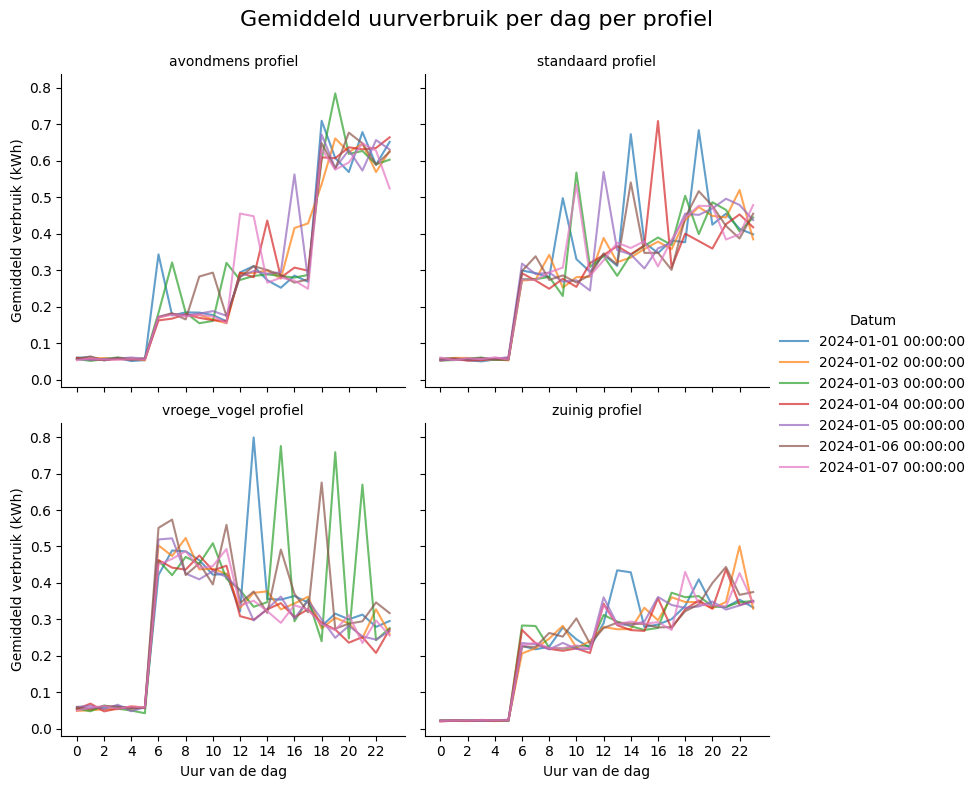

In [20]:
# Groeperen: gemiddeld verbruik per profiel, per dag, per uur
df_daggem = (
    df_melted
    .groupby(['profiel', 'datum', 'uur'])['verbruik']
    .mean()
    .reset_index()
)

# Plotten: FacetGrid met per profiel meerdere lijnen (1 per dag)
g = sns.FacetGrid(df_daggem, col="profiel", col_wrap=2, height=4, sharey=True)

g.map_dataframe(
    sns.lineplot,
    x="uur", y="verbruik", hue="datum", palette="tab10", alpha=0.7
)

g.set_titles(col_template="{col_name} profiel")
g.set_axis_labels("Uur van de dag", "Gemiddeld verbruik (kWh)")
g.set(xticks=range(0, 24, 2))
g.add_legend(title="Datum")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gemiddeld uurverbruik per dag per profiel", fontsize=16)
plt.show()
